# Multiple Linear Regression
## Car Price Case Study

#### Problem Statement:

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 
They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. 

Essentially, the company wants —


- To identify the variables which are significant in predicting the price of a car

- To create a linear model that quantitatively relates price of a car with variables such as carCompany, fueltype etc.

- To know the accuracy of the model, i.e. how well these variables can predict the price of a car

**So interpretation is important!**

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the car price dataset

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np   # linear algebra
import pandas as pd   # data processing, CSV file I/O

#For plotting
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline


# creating the path variable to laod the directory of the data

vPath = "C:\\Users\\sidharth.choudhary\\Desktop\\Udemy Data Course\\upgrad\\Machine Learning - 1\\Module 1 Linear Regression\\Assignment"

# loading the loan data

carprice = pd.read_csv(vPath + '\CarPrice_Assignment.csv' , sep = ',',engine = 'python')

In [3]:
# Check the head of the dataset
carprice.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
# Inspect the various aspects of the housing dataframe
carprice.shape

(205, 26)

In [5]:
carprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [6]:
# Lets split the carname to company name and car model name 
new = carprice["CarName"].str.split(" ", n = 1, expand = True) 

# making seperate car name column from new data frame 
carprice["carcompany"]= new[0] 
  
# making seperate car model column from new data frame 
carprice["carmodel"]= new[1] 

In [7]:
carprice.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carcompany,carmodel
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


In [8]:
carprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 28 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [9]:
# lets remove car_ID and CarName
carprice.drop(['car_ID','CarName'], axis=1,inplace = True) 

In [10]:
# Checking the Unique Values in each category
car_catlist = carprice[['symboling','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem','carcompany','carmodel']]
print(car_catlist.columns)
for i in car_catlist:
    print(car_catlist[i].unique())

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem', 'carcompany', 'carmodel'],
      dtype='object')
[ 3  1  2  0 -1 -2]
['gas' 'diesel']
['std' 'turbo']
['two' 'four']
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['rwd' 'fwd' '4wd']
['front' 'rear']
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan'
 'peugeot' 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru'
 'toyota' 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']
['giulia' 'stelvio' 'Quadrifoglio' '100 ls' '100ls' 'fox' '5000' '4000'
 '5000s (diesel)' '320i' 'x1' 'x3' 'z4' 'x4' 'x5' 'impala' 'monte carlo'
 'vega 2300' 'rampage' 'challenger se' 'd200' 'monaco (sw)'

In [11]:
carprice['carcompany'].replace(['maxda'], 'mazda',inplace=True)
carprice['carcompany'].replace(['toyouta'], 'toyota',inplace=True)
carprice['carcompany'].replace(['vw'], 'volkswagen',inplace=True)
carprice['carcompany'].replace(['vokswagen'], 'volkswagen',inplace=True)
carprice['carcompany'].replace(['Nissan'], 'nissan',inplace=True)
carprice['carcompany'].replace(['porcshce'], 'porsche',inplace=True)
carprice['enginetype'].replace(['dohcv'], 'dohc',inplace=True)


In [12]:
# Checking the Unique Values in each category again
car_catlist = carprice[['symboling','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem','carcompany','carmodel']]
print(car_catlist.columns)
for i in car_catlist:
    print(car_catlist[i].unique())

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem', 'carcompany', 'carmodel'],
      dtype='object')
[ 3  1  2  0 -1 -2]
['gas' 'diesel']
['std' 'turbo']
['two' 'four']
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['rwd' 'fwd' '4wd']
['front' 'rear']
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf']
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']
['giulia' 'stelvio' 'Quadrifoglio' '100 ls' '100ls' 'fox' '5000' '4000'
 '5000s (diesel)' '320i' 'x1' 'x3' 'z4' 'x4' 'x5' 'impala' 'monte carlo'
 'vega 2300' 'rampage' 'challenger se' 'd200' 'monaco (sw)' 'colt hardtop'
 'colt (sw)' 'coronet custom' 'dart custom' 'cor

In [13]:
# Check NA Value present
carprice.isnull().sum()

symboling           0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
carcompany          0
carmodel            2
dtype: int64

In [14]:
# Since symboling is insurance risk rating. lets convert them to Categorical
carprice['symboling'] = carprice['symboling'].astype('category', ordered=True)


In [15]:
carprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling           205 non-null category
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null int64
highwaympg 

In [16]:
carprice.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


The count, mean, min and max rows are self-explanatory. The std shows the standard deviation, and the 25%, 50% and 75% rows show the corresponding percentiles

# Step 2: Visualising the Data
Let's now spend some time doing what is arguably the most important step - understanding the data.
If there is some obvious multicollinearity going on, this is the first place to catch it
Here's where you'll also identify if some predictors directly have a strong association with the outcome variable
We'll visualise our data using matplotlib and seaborn.

# Visualising Categorical Variables
As you might have noticed, there are a few categorical variables as well. Let's take count and then make boxplot

In [17]:
print(carprice["symboling"].value_counts())

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64


In [18]:
print(carprice["fueltype"].value_counts())

gas       185
diesel     20
Name: fueltype, dtype: int64


In [19]:
print(carprice["aspiration"].value_counts())

std      168
turbo     37
Name: aspiration, dtype: int64


In [20]:
print(carprice["doornumber"].value_counts())

four    115
two      90
Name: doornumber, dtype: int64


In [21]:
print(carprice["carbody"].value_counts())

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64


In [22]:
print(carprice["drivewheel"].value_counts())

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64


In [23]:
print(carprice["enginelocation"].value_counts())

front    202
rear       3
Name: enginelocation, dtype: int64


In [24]:
print(carprice["enginetype"].value_counts())

ohc      148
ohcf      15
dohc      13
ohcv      13
l         12
rotor      4
Name: enginetype, dtype: int64


In [25]:
print(carprice["cylindernumber"].value_counts())

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64


In [26]:
print(carprice["fuelsystem"].value_counts())

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
spfi     1
mfi      1
Name: fuelsystem, dtype: int64


In [27]:
print(carprice["carcompany"].value_counts())

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
volvo          11
peugeot        11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
alfa-romero     3
jaguar          3
chevrolet       3
renault         2
mercury         1
Name: carcompany, dtype: int64


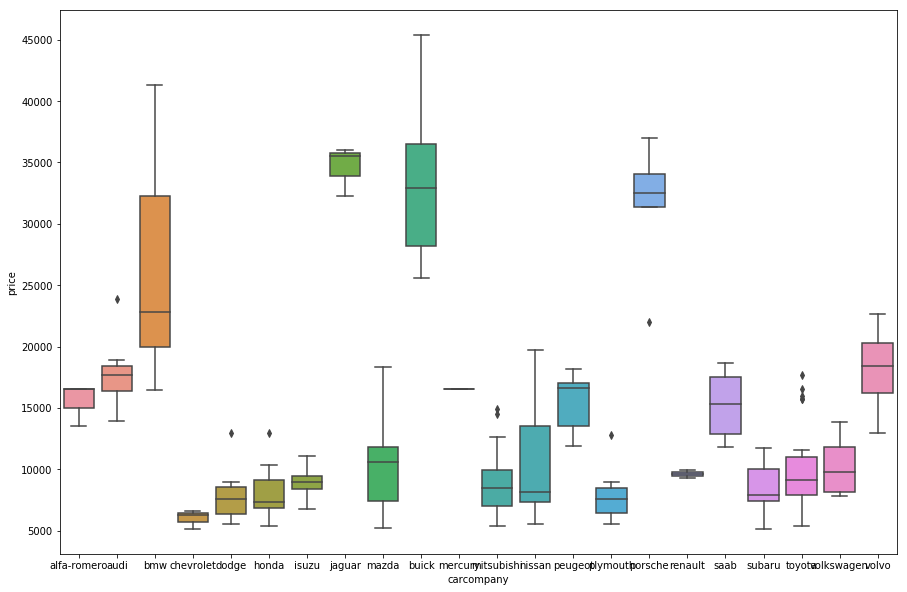

In [28]:
# Lets plot carcompany alone as it has many values.
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'carcompany', y = 'price', data = carprice)
plt.show()

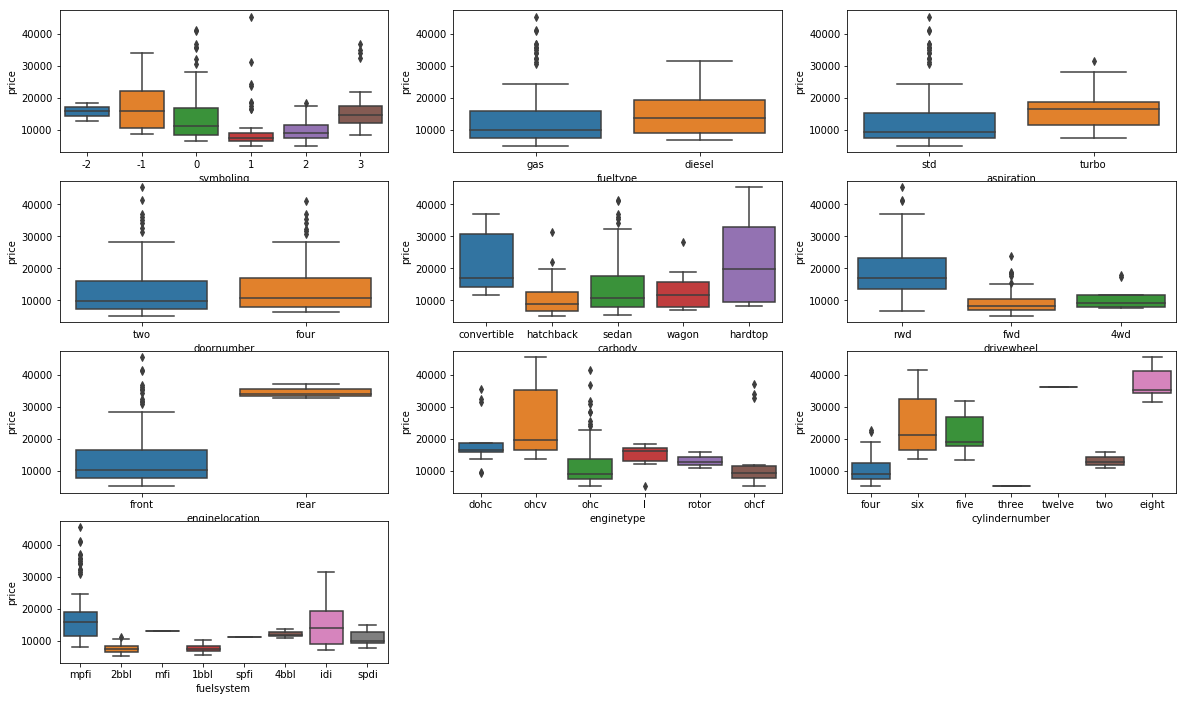

In [29]:
# Lets plot other Categorical data

plt.figure(figsize=(20, 12))
plt.subplot(4,3,1)
sns.boxplot(x = 'symboling', y = 'price', data = carprice)
plt.subplot(4,3,2)
sns.boxplot(x = 'fueltype', y = 'price', data = carprice)
plt.subplot(4,3,3)
sns.boxplot(x = 'aspiration', y = 'price', data = carprice)
plt.subplot(4,3,4)
sns.boxplot(x = 'doornumber', y = 'price', data = carprice)
plt.subplot(4,3,5)
sns.boxplot(x = 'carbody', y = 'price', data = carprice)
plt.subplot(4,3,6)
sns.boxplot(x = 'drivewheel', y = 'price', data = carprice)
plt.subplot(4,3,7)
sns.boxplot(x = 'enginelocation', y = 'price', data = carprice)
plt.subplot(4,3,8)
sns.boxplot(x = 'enginetype', y = 'price', data = carprice)
plt.subplot(4,3,9)
sns.boxplot(x = 'cylindernumber', y = 'price', data = carprice)
plt.subplot(4,3,10)
sns.boxplot(x = 'fuelsystem', y = 'price', data = carprice)
plt.show()

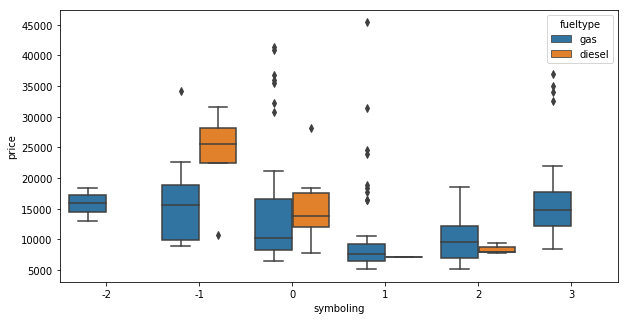

In [30]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'symboling', y = 'price', hue = 'fueltype', data = carprice)
plt.show()

In [31]:
carprice.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


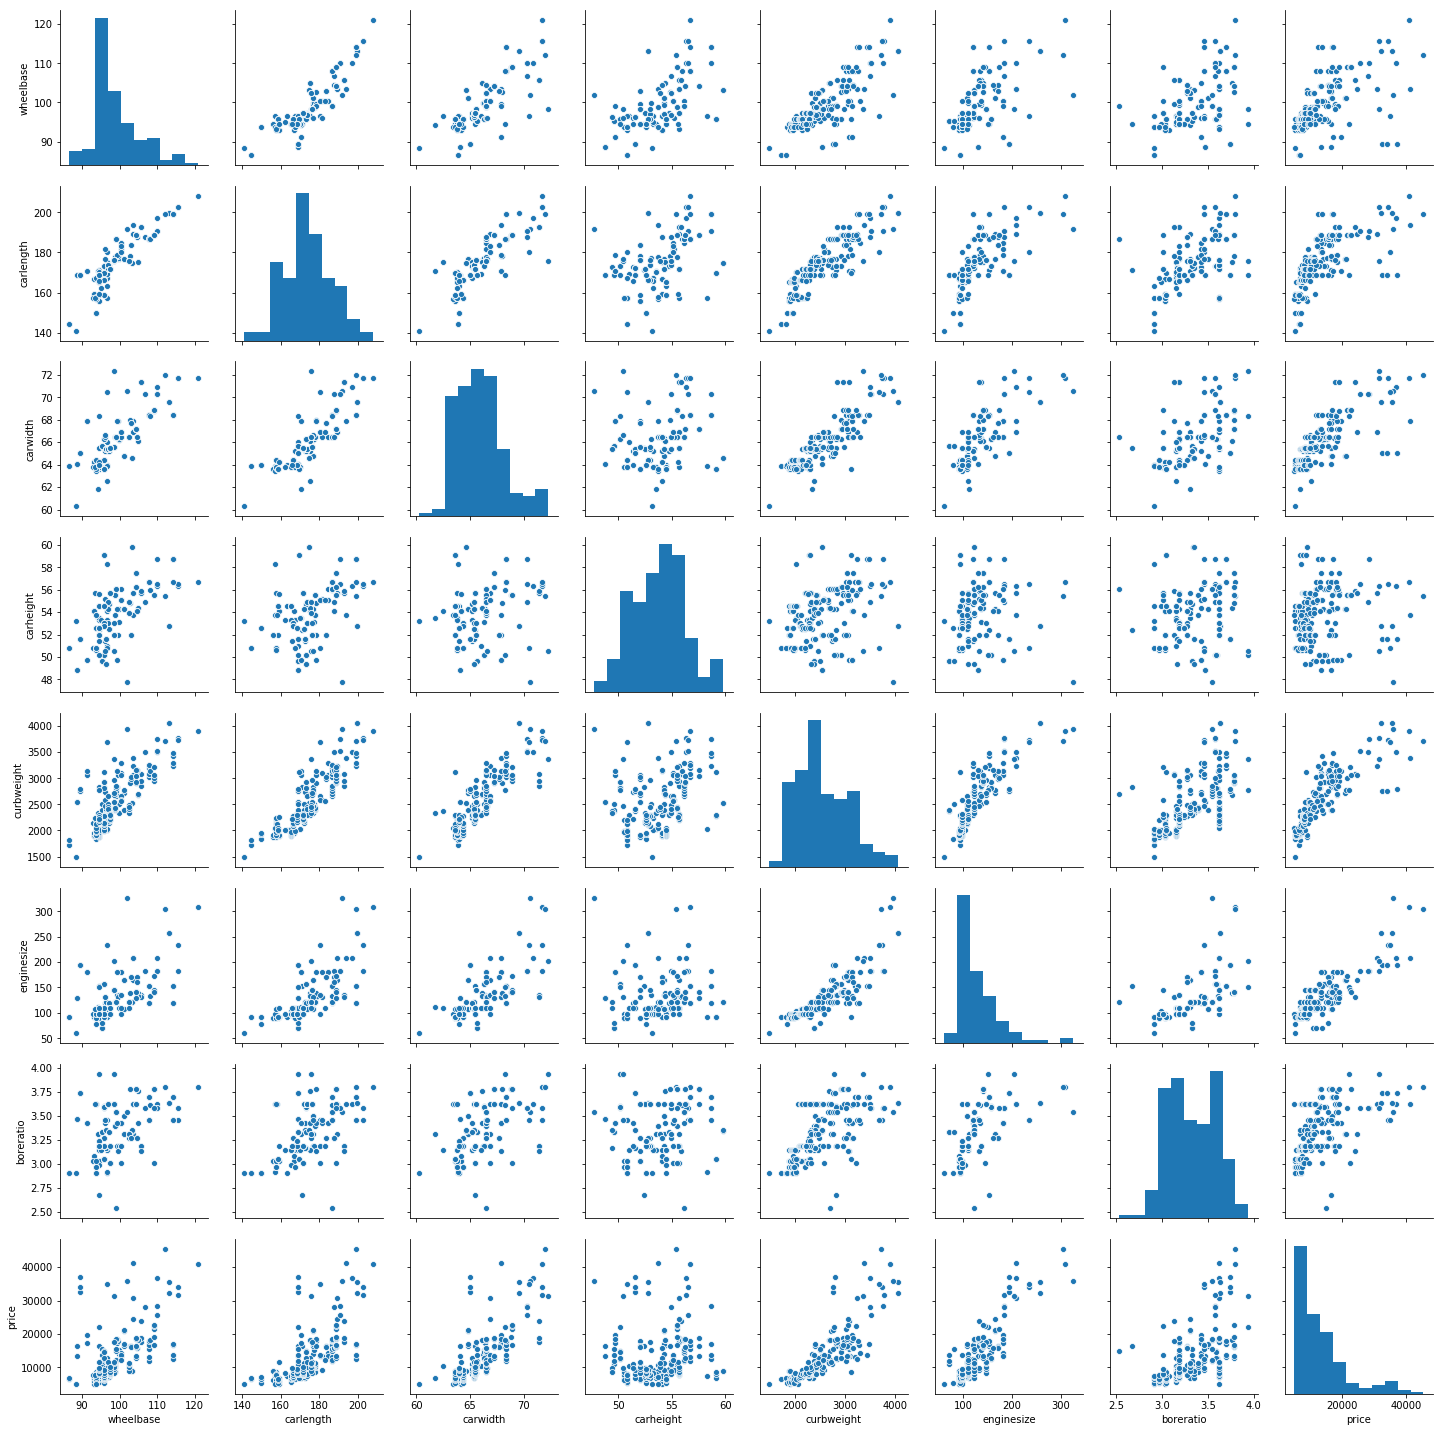

In [32]:
list1 = carprice[['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','price']]
list2 = carprice[['stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']]
sns.pairplot(list1)
plt.show()

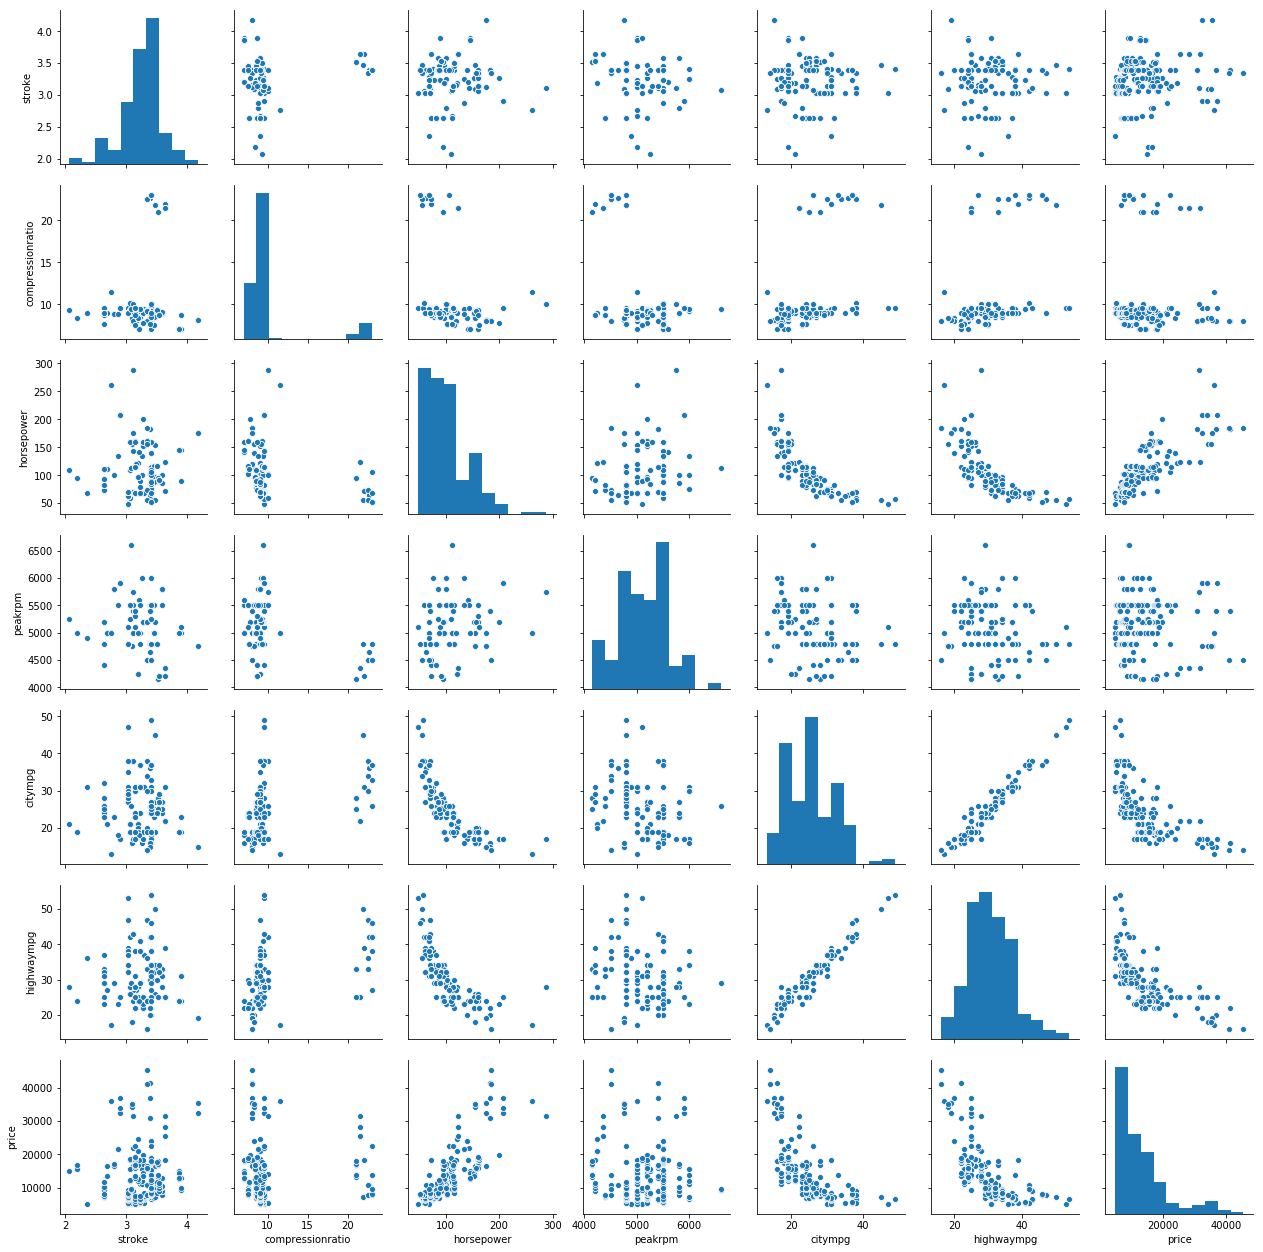

In [33]:
sns.pairplot(list2)
plt.show()

## Step 3: Data Preparation

### Dummy variables

In [34]:
carcomapny_status = pd.get_dummies(carprice['carcompany'], drop_first = True)
# Add the results to the original carprice dataframe
carprice = pd.concat([carprice, carcomapny_status], axis = 1)


fueltype_status = pd.get_dummies(carprice['fueltype'], drop_first = True)
# Add the results to the original carprice dataframe
carprice = pd.concat([carprice, fueltype_status], axis = 1)

aspiration_status = pd.get_dummies(carprice['aspiration'], drop_first = True)
# Add the results to the original carprice dataframe
carprice = pd.concat([carprice, aspiration_status], axis = 1)

doornumber_status = pd.get_dummies(carprice['doornumber'], drop_first = True)
# Add the results to the original carprice dataframe
carprice = pd.concat([carprice, doornumber_status], axis = 1)

enginelocation_status = pd.get_dummies(carprice['enginelocation'])
# Add the results to the original carprice dataframe
carprice = pd.concat([carprice,enginelocation_status], axis = 1)

carbody_status = pd.get_dummies(carprice['carbody'], drop_first = True)
# Add the results to the original carprice dataframe
carprice = pd.concat([carprice, carbody_status], axis = 1)

drivewheel_status = pd.get_dummies(carprice['drivewheel'], drop_first = True)
# Add the results to the original carprice dataframe
carprice = pd.concat([carprice, drivewheel_status], axis = 1)

enginetype_status = pd.get_dummies(carprice['enginetype'], drop_first = True)
# Add the results to the original carprice dataframe
carprice = pd.concat([carprice, enginetype_status], axis = 1)

cylindernumber_status = pd.get_dummies(carprice['cylindernumber'], drop_first = True)
# Add the results to the original carprice dataframe
carprice = pd.concat([carprice, cylindernumber_status], axis = 1)

fuelsystem_status = pd.get_dummies(carprice['fuelsystem'], drop_first = True)
# Add the results to the original carprice dataframe
carprice = pd.concat([carprice, fuelsystem_status], axis = 1)

doornumber_status = pd.get_dummies(carprice['doornumber'], drop_first = True)
# Add the results to the original carprice dataframe
carprice = pd.concat([carprice, doornumber_status], axis = 1)

symboling_status = pd.get_dummies(carprice['symboling'], drop_first = True)
# Add the results to the original carprice dataframe
carprice = pd.concat([carprice, symboling_status], axis = 1)



In [35]:
# Drop 'carcompany' as we have created the dummies for it
carprice.drop(['carcompany'], axis = 1, inplace = True)

# Drop 'fueltype' as we have created the dummies for it
carprice.drop(['fueltype'], axis = 1, inplace = True)

# Drop 'aspiration' as we have created the dummies for it
carprice.drop(['aspiration'], axis = 1, inplace = True)

# Drop 'carbody' as we have created the dummies for it
carprice.drop(['carbody'], axis = 1, inplace = True)

# Drop 'drivewheel' as we have created the dummies for it
carprice.drop(['drivewheel'], axis = 1, inplace = True)

# Drop 'enginelocation' as we have created the dummies for it
carprice.drop(['enginelocation'], axis = 1, inplace = True)

# Drop 'enginetype' as we have created the dummies for it
carprice.drop(['enginetype'], axis = 1, inplace = True)

# Drop 'cylindernumber' as we have created the dummies for it
carprice.drop(['cylindernumber'], axis = 1, inplace = True)

# Drop 'fuelsystem' as we have created the dummies for it
carprice.drop(['fuelsystem'], axis = 1, inplace = True)

# Drop 'doornumber' as we have created the dummies for it
carprice.drop(['doornumber'], axis = 1, inplace = True)

# Drop 'symboling' as we have created the dummies for it
carprice.drop(['symboling'], axis = 1, inplace = True)

# Drop 'rear' to get rid of dummies
carprice.drop(['rear'], axis = 1, inplace = True)

In [36]:
# Drop 'carmodel' as it has many values 
carprice.drop(['carmodel'], axis = 1, inplace = True)

In [37]:
carprice.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,mfi,mpfi,spdi,spfi,two,-1,0,1,2,3
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,1,0,0,1,0,0,0,0,1
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,1,0,0,1,0,0,0,0,1
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,1,0,0,1,0,0,1,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,0,1,0,0,0,0,0,0,1,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,0,1,0,0,0,0,0,0,1,0


## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [38]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(carprice, train_size = 0.7, test_size = 0.3, random_state = 100)

# Rescaling the Features 

We will use MinMax scaling.

In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [40]:
# Apply scaler() to all the columns except 'dummy' variables
num_vars = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()


,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,mfi,mpfi,spdi,spfi,two,-1,0,1,2,3
122,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,0.230159,0.525253,0.15000,0.083333,...,0,0,0,0,0,0,0,1,0,0
125,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,1.000000,0.464646,0.15625,0.395833,...,0,1,0,0,1,0,0,0,0,1
166,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,0.444444,0.449495,0.15000,0.266667,...,0,1,0,0,1,0,0,1,0,0
1,0.068966,0.450407,0.316667,0.088496,0.411171,0.260377,0.626984,0.247475,0.12500,0.262500,...,0,1,0,0,1,0,0,0,0,1
199,0.610345,0.775610,0.575000,0.858407,0.647401,0.260377,0.746032,0.484848,0.03125,0.475000,...,0,1,0,0,0,1,0,0,0,0


In [41]:
df_train.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,mfi,mpfi,spdi,spfi,two,-1,0,1,2,3
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.0,143.000000,143.000000,143.0,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.411141,0.525476,0.461655,0.509004,0.407878,0.241351,0.497946,0.535389,0.190787,0.227302,...,0.0,0.440559,0.041958,0.0,0.440559,0.090909,0.349650,0.300699,0.118881,0.125874
std,0.205581,0.204848,0.184517,0.215378,0.211269,0.154619,0.207140,0.157843,0.237181,0.165511,...,0.0,0.498199,0.201198,0.0,0.498199,0.288490,0.478536,0.460174,0.324786,0.332873
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.272414,0.399187,0.304167,0.353982,0.245539,0.135849,0.305556,0.464646,0.100000,0.091667,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.341379,0.502439,0.425000,0.522124,0.355702,0.184906,0.500000,0.545455,0.125000,0.191667,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.503448,0.669919,0.550000,0.668142,0.559542,0.301887,0.682540,0.611111,0.150000,0.283333,...,0.0,1.000000,0.000000,0.0,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
### Dividing into X and Y sets for the model building
y_train = df_train.pop('price')
X_train = df_train

# Step 5: Building a linear model

Fit a regression line through the training data using `statsmodels`. Remember that in `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

In [43]:
# First Model. First we will select all the models and then one by one , remove the unimportant one

# Check all the columns of the dataframe
carprice.columns

Index([       'wheelbase',        'carlength',         'carwidth',
              'carheight',       'curbweight',       'enginesize',
              'boreratio',           'stroke', 'compressionratio',
             'horsepower',          'peakrpm',          'citympg',
             'highwaympg',            'price',             'audi',
                    'bmw',            'buick',        'chevrolet',
                  'dodge',            'honda',            'isuzu',
                 'jaguar',            'mazda',          'mercury',
             'mitsubishi',           'nissan',          'peugeot',
               'plymouth',          'porsche',          'renault',
                   'saab',           'subaru',           'toyota',
             'volkswagen',            'volvo',              'gas',
                  'turbo',              'two',            'front',
                'hardtop',        'hatchback',            'sedan',
                  'wagon',              'fwd',              'r

In [44]:
#Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

model1 = sm.OLS(y_train, X_train_lm).fit()

model1.params

const              -7.764765e-03
wheelbase           1.902782e-01
carlength          -1.681170e-01
carwidth            2.635944e-01
carheight          -1.494869e-01
curbweight          3.336438e-01
enginesize          1.664863e+00
boreratio          -4.940411e-01
stroke             -1.839393e-01
compressionratio   -2.154247e-01
horsepower          1.869092e-02
peakrpm             1.722951e-01
citympg            -3.266097e-02
highwaympg          1.154759e-01
audi                2.630469e-02
bmw                 2.892210e-01
buick               7.986920e-03
chevrolet          -7.789712e-02
dodge              -1.174175e-01
honda              -9.754408e-02
isuzu              -2.013663e-02
jaguar             -7.989249e-02
mazda              -4.690933e-03
mercury             4.187138e-15
mitsubishi         -1.452504e-01
nissan             -1.819789e-03
peugeot            -2.286483e-01
plymouth           -1.240494e-01
porsche             2.036616e-01
renault            -3.335614e-02
          

In [45]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     53.80
Date:                Mon, 01 Apr 2019   Prob (F-statistic):           2.84e-47
Time:                        23:46:09   Log-Likelihood:                 281.35
No. Observations:                 143   AIC:                            -440.7
Df Residuals:                      82   BIC:                            -260.0
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0078      0.150  

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [46]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
54,two,inf
57,idi,inf
30,subaru,inf
36,two,inf
37,front,inf
25,peugeot,inf
44,l,inf
46,ohcf,inf
48,rotor,inf
52,three,inf


We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, many variables are insignificant. Let's go ahead and drop these variables

In [47]:
X = X_train_lm.drop(['two','three','l','ohcf','wheelbase','compressionratio','citympg','audi','isuzu','mazda','nissan','two','fwd','ohc','six','2bbl','4bbl','idi','mpfi'],1,)


In [48]:
# Build a Second fitted model
X_train_lm = sm.add_constant(X)

model2 = sm.OLS(y_train, X_train_lm).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     55.78
Date:                Mon, 01 Apr 2019   Prob (F-statistic):           1.24e-52
Time:                        23:46:10   Log-Likelihood:                 252.27
No. Observations:                 143   AIC:                            -412.5
Df Residuals:                      97   BIC:                            -276.3
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1656      0.157      1.054      0.2

In [49]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,1391.42
5,enginesize,84.64
45,0,42.19
4,curbweight,41.87
46,1,40.50
8,horsepower,27.40
33,sedan,27.29
48,3,23.56
1,carlength,22.87
32,hatchback,20.68


In [50]:
### Dropping the variable that is insignificant and updating the model
X = X_train_lm.drop([3,2,-1,'mfi','spfi','mercury','const'],1,)


In [51]:
# Build a Third fitted model
X_train_lm = sm.add_constant(X)

model3 = sm.OLS(y_train, X_train_lm).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     58.06
Date:                Mon, 01 Apr 2019   Prob (F-statistic):           4.34e-54
Time:                        23:46:10   Log-Likelihood:                 248.19
No. Observations:                 143   AIC:                            -410.4
Df Residuals:                     100   BIC:                            -283.0
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2332      0.134      1.738      0.0

In [52]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
28,front,263.25
4,enginesize,209.75
3,curbweight,190.63
0,carlength,149.10
6,stroke,106.67
1,carwidth,93.63
5,boreratio,80.43
7,horsepower,67.11
37,four,58.92
26,gas,45.45


In [53]:
### Dropping the variable that is insignificant and updating the model
X = X_train_lm.drop([0,1,'carlength','gas'],1,)


In [54]:
# Build a Fourth fitted model
X_train_lm = sm.add_constant(X)

model4 = sm.OLS(y_train, X_train_lm).fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     65.31
Date:                Mon, 01 Apr 2019   Prob (F-statistic):           3.04e-57
Time:                        23:46:10   Log-Likelihood:                 246.70
No. Observations:                 143   AIC:                            -415.4
Df Residuals:                     104   BIC:                            -299.9
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2131      0.106      2.006      0.0

In [55]:
# Calculate the VIFs again for the fourth model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,631.23
4,enginesize,77.59
3,curbweight,30.91
7,horsepower,18.66
30,sedan,17.75
36,four,16.52
29,hatchback,16.21
5,boreratio,12.17
34,rotor,10.00
31,wagon,9.95


In [56]:
### Dropping the variable that is insignificant and updating the model
X = X_train_lm.drop(['spdi','curbweight'],1,)

In [57]:
# Build a Fifth fitted model
X_train_lm = sm.add_constant(X)

model5 = sm.OLS(y_train, X_train_lm).fit()
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     64.61
Date:                Mon, 01 Apr 2019   Prob (F-statistic):           2.88e-57
Time:                        23:46:11   Log-Likelihood:                 240.96
No. Observations:                 143   AIC:                            -407.9
Df Residuals:                     106   BIC:                            -298.3
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2154      0.109      1.967      0.0

In [58]:
# Calculate the VIFs again for the fifth model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,631.07
3,enginesize,65.41
6,horsepower,18.65
29,sedan,17.71
35,four,16.45
28,hatchback,16.09
4,boreratio,12.17
30,wagon,9.75
33,rotor,9.51
1,carwidth,7.78


In [59]:
### Dropping the variable that is insignificant and updating the model
X = X_train_lm.drop(['enginesize'],1,)

In [60]:
# Build a Sixth fitted model
X_train_lm = sm.add_constant(X)

model6 = sm.OLS(y_train, X_train_lm).fit()
print(model6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     56.23
Date:                Mon, 01 Apr 2019   Prob (F-statistic):           2.45e-54
Time:                        23:46:11   Log-Likelihood:                 228.94
No. Observations:                 143   AIC:                            -385.9
Df Residuals:                     107   BIC:                            -279.2
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4700      0.101      4.670      0.0

In [61]:
# Calculate the VIFs again for the sixth model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,455.11
28,sedan,16.80
5,horsepower,15.94
27,hatchback,14.99
34,four,10.53
29,wagon,9.24
3,boreratio,7.16
1,carwidth,6.63
4,stroke,6.20
20,subaru,5.91


In [62]:
### Dropping the variable that is insignificant and updating the model
X = X_train_lm.drop(['highwaympg','twelve'],1,)

In [63]:
# Build a Seventh fitted model
X_train_lm = sm.add_constant(X)

model7 = sm.OLS(y_train, X_train_lm).fit()
print(model7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     60.65
Date:                Mon, 01 Apr 2019   Prob (F-statistic):           4.39e-56
Time:                        23:46:11   Log-Likelihood:                 228.82
No. Observations:                 143   AIC:                            -389.6
Df Residuals:                     109   BIC:                            -288.9
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4746      0.094      5.045      0.0

In [64]:
# Calculate the VIFs again for the seventh model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,404.38
27,sedan,14.75
26,hatchback,13.50
5,horsepower,12.09
33,four,9.37
28,wagon,8.51
3,boreratio,6.98
1,carwidth,6.56
29,rwd,5.68
2,carheight,5.49


In [65]:
### Dropping the variable that is insignificant and updating the model
X = X_train_lm.drop(['ohcv','boreratio'],1,)

In [66]:
# Build a Eight fitted model
X_train_lm = sm.add_constant(X)

model8 = sm.OLS(y_train, X_train_lm).fit()
print(model8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     65.75
Date:                Mon, 01 Apr 2019   Prob (F-statistic):           6.67e-58
Time:                        23:46:12   Log-Likelihood:                 228.82
No. Observations:                 143   AIC:                            -393.6
Df Residuals:                     111   BIC:                            -298.8
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4745      0.092      5.154      0.0

In [67]:
# Calculate the VIFs again for the eight model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,394.30
26,sedan,14.12
25,hatchback,12.68
4,horsepower,9.13
27,wagon,8.23
1,carwidth,6.44
2,carheight,5.49
31,four,5.35
28,rwd,5.31
13,peugeot,4.26


In [68]:
### Dropping highest VIF  that is sedan and updating the model
X = X_train_lm.drop(['sedan'],1,)

In [69]:
# Build a Ninth fitted model
X_train_lm = sm.add_constant(X)

model9 = sm.OLS(y_train, X_train_lm).fit()
print(model9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     60.52
Date:                Mon, 01 Apr 2019   Prob (F-statistic):           5.32e-56
Time:                        23:46:12   Log-Likelihood:                 220.40
No. Observations:                 143   AIC:                            -378.8
Df Residuals:                     112   BIC:                            -286.9
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4045      0.095      4.251      0.0

In [70]:
# Calculate the VIFs again for the Ninth model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,377.90
4,horsepower,9.00
1,carwidth,6.39
30,four,5.28
27,rwd,5.26
2,carheight,5.18
13,peugeot,4.26
3,stroke,3.58
5,peakrpm,3.01
7,buick,2.76


In [71]:
### stroke is insignificant. So removing and updating the model
X = X_train_lm.drop(['stroke'],1,)

In [72]:
# Build a tenth fitted model
X_train_lm = sm.add_constant(X)

model10 = sm.OLS(y_train, X_train_lm).fit()
print(model10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     63.10
Date:                Mon, 01 Apr 2019   Prob (F-statistic):           6.98e-57
Time:                        23:46:13   Log-Likelihood:                 220.33
No. Observations:                 143   AIC:                            -380.7
Df Residuals:                     113   BIC:                            -291.8
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4097      0.093      4.384      0.0

In [73]:
# Calculate the VIFs for the tenth model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,367.39
3,horsepower,9.00
1,carwidth,6.07
29,four,5.28
26,rwd,5.16
2,carheight,4.64
12,peugeot,3.72
4,peakrpm,2.78
28,five,2.57
6,buick,2.53


In [74]:
### peakrpm is insignificant. So removing and updating the model
X = X_train_lm.drop(['peakrpm'],1,)


In [75]:
# Build a eleventh fitted model
X_train_lm = sm.add_constant(X)

model11 = sm.OLS(y_train, X_train_lm).fit()
print(model11.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     65.80
Date:                Mon, 01 Apr 2019   Prob (F-statistic):           9.39e-58
Time:                        23:46:13   Log-Likelihood:                 220.20
No. Observations:                 143   AIC:                            -382.4
Df Residuals:                     114   BIC:                            -296.5
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4151      0.092      4.494      0.0

In [76]:
# Calculate the VIFs for the eleventh model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,361.32
3,horsepower,7.21
1,carwidth,5.73
25,rwd,5.15
28,four,5.02
2,carheight,4.63
11,peugeot,3.72
5,buick,2.47
13,porsche,2.41
21,front,2.37


In [77]:
### wagon is insignificant. So removing and updating the model
X = X_train_lm.drop(['wagon'],1,)


In [78]:
# Build a twelveth fitted model
X_train_lm = sm.add_constant(X)

model12 = sm.OLS(y_train, X_train_lm).fit()
print(model12.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     68.37
Date:                Mon, 01 Apr 2019   Prob (F-statistic):           1.61e-58
Time:                        23:46:13   Log-Likelihood:                 219.74
No. Observations:                 143   AIC:                            -383.5
Df Residuals:                     115   BIC:                            -300.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4023      0.091      4.419      0.0

In [79]:
# Calculate the VIFs for the eleventh model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,351.89
3,horsepower,6.82
1,carwidth,5.49
24,rwd,5.14
27,four,5.01
11,peugeot,3.72
2,carheight,3.68
5,buick,2.47
13,porsche,2.41
21,front,2.36


In [80]:
### volkswagen is insignificant. So removing and updating the model
X = X_train_lm.drop(['volkswagen'],1,)


In [81]:
# Build a thirteenth fitted model
X_train_lm = sm.add_constant(X)

model13 = sm.OLS(y_train, X_train_lm).fit()
print(model13.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     71.61
Date:                Mon, 01 Apr 2019   Prob (F-statistic):           1.90e-59
Time:                        23:46:13   Log-Likelihood:                 219.73
No. Observations:                 143   AIC:                            -385.5
Df Residuals:                     116   BIC:                            -305.5
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4027      0.091      4.444      0.0

In [82]:
### volkswagen is insignificant. So removing and updating the model
X = X_train_lm.drop(['chevrolet'],1,)


In [83]:
# Build a fourteen fitted model
X_train_lm = sm.add_constant(X)

model14 = sm.OLS(y_train, X_train_lm).fit()
print(model14.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     75.09
Date:                Mon, 01 Apr 2019   Prob (F-statistic):           2.20e-60
Time:                        23:46:14   Log-Likelihood:                 219.71
No. Observations:                 143   AIC:                            -387.4
Df Residuals:                     117   BIC:                            -310.4
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4007      0.090      4.470      0.0

In [84]:
### five and honda is insignificant. So removing and updating the model
X = X_train_lm.drop(['five' ,'honda'],1,)

In [85]:
# Build a fifteen fitted model
X_train_lm = sm.add_constant(X)

model15 = sm.OLS(y_train, X_train_lm).fit()
print(model15.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     81.35
Date:                Mon, 01 Apr 2019   Prob (F-statistic):           8.13e-62
Time:                        23:46:14   Log-Likelihood:                 218.35
No. Observations:                 143   AIC:                            -388.7
Df Residuals:                     119   BIC:                            -317.6
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3864      0.089      4.332      0.0

In [86]:
### plymouth is insignificant. So removing and updating the model
X = X_train_lm.drop(['plymouth'],1,)

In [87]:
# Build a sixteen fitted model
X_train_lm = sm.add_constant(X)

model16 = sm.OLS(y_train, X_train_lm).fit()
print(model16.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     84.76
Date:                Mon, 01 Apr 2019   Prob (F-statistic):           1.66e-62
Time:                        23:46:14   Log-Likelihood:                 217.56
No. Observations:                 143   AIC:                            -389.1
Df Residuals:                     120   BIC:                            -321.0
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3717      0.088      4.206      0.0

In [88]:
### rotor is insignificant. So removing and updating the model
X = X_train_lm.drop(['rotor'],1,)

In [89]:
# Build a seventeen fitted model
X_train_lm = sm.add_constant(X)

model17 = sm.OLS(y_train, X_train_lm).fit()
print(model17.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     88.65
Date:                Mon, 01 Apr 2019   Prob (F-statistic):           3.04e-63
Time:                        23:46:14   Log-Likelihood:                 216.89
No. Observations:                 143   AIC:                            -389.8
Df Residuals:                     121   BIC:                            -324.6
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3598      0.088      4.101      0.0

In [90]:
# Calculate the VIFs

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,330.28
3,horsepower,5.43
1,carwidth,4.58
20,rwd,4.15
9,peugeot,3.31
21,four,3.13
2,carheight,3.12
10,porsche,2.32
17,front,2.32
5,buick,2.21


In [91]:
### hardtop is insignificant. So removing and updating the model
X = X_train_lm.drop(['hardtop'],1,)

In [92]:
# Build a eighteen fitted model
X_train_lm = sm.add_constant(X)

model18 = sm.OLS(y_train, X_train_lm).fit()
print(model18.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     93.68
Date:                Mon, 01 Apr 2019   Prob (F-statistic):           3.42e-64
Time:                        23:46:15   Log-Likelihood:                 216.77
No. Observations:                 143   AIC:                            -391.5
Df Residuals:                     122   BIC:                            -329.3
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3404      0.076      4.470      0.0

In [93]:
### toyota is insignificant. So removing and updating the model
X = X_train_lm.drop(['toyota'],1,)

In [94]:
# Build a Nineteen fitted model
X_train_lm = sm.add_constant(X)

model19 = sm.OLS(y_train, X_train_lm).fit()
print(model19.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     99.38
Date:                Mon, 01 Apr 2019   Prob (F-statistic):           3.46e-65
Time:                        23:46:15   Log-Likelihood:                 216.74
No. Observations:                 143   AIC:                            -393.5
Df Residuals:                     123   BIC:                            -334.2
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3419      0.076      4.526      0.0

In [95]:
### peugeot is insignificant. So removing and updating the model
X = X_train_lm.drop(['peugeot'],1,)

In [96]:
# Build a twenty fitted model
X_train_lm = sm.add_constant(X)

model20 = sm.OLS(y_train, X_train_lm).fit()
print(model20.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     105.6
Date:                Mon, 01 Apr 2019   Prob (F-statistic):           3.65e-66
Time:                        23:46:15   Log-Likelihood:                 216.63
No. Observations:                 143   AIC:                            -395.3
Df Residuals:                     124   BIC:                            -339.0
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3451      0.075      4.605      0.0

In [97]:
### dodge is insignificant. So removing and updating the model
X = X_train_lm.drop(['dodge'],1,)

In [98]:
# Build a twentyone fitted model
X_train_lm = sm.add_constant(X)

model21 = sm.OLS(y_train, X_train_lm).fit()
print(model21.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     110.9
Date:                Mon, 01 Apr 2019   Prob (F-statistic):           8.52e-67
Time:                        23:46:15   Log-Likelihood:                 215.56
No. Observations:                 143   AIC:                            -395.1
Df Residuals:                     125   BIC:                            -341.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3342      0.075      4.469      0.0

In [99]:
### renault is insignificant. So removing and updating the model
X = X_train_lm.drop(['renault'],1,)

In [100]:
# Build a twentytwo fitted model
X_train_lm = sm.add_constant(X)

model22 = sm.OLS(y_train, X_train_lm).fit()
print(model22.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     117.6
Date:                Mon, 01 Apr 2019   Prob (F-statistic):           1.36e-67
Time:                        23:46:16   Log-Likelihood:                 214.90
No. Observations:                 143   AIC:                            -395.8
Df Residuals:                     126   BIC:                            -345.4
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3305      0.075      4.422      0.0

In [101]:
### renault is insignificant. So removing and updating the model
X = X_train_lm.drop(['carheight'],1,)

In [102]:
# Build a twentythree fitted model
X_train_lm = sm.add_constant(X)

model23 = sm.OLS(y_train, X_train_lm).fit()
print(model23.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     124.5
Date:                Mon, 01 Apr 2019   Prob (F-statistic):           2.96e-68
Time:                        23:46:16   Log-Likelihood:                 213.87
No. Observations:                 143   AIC:                            -395.7
Df Residuals:                     127   BIC:                            -348.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3031      0.072      4.199      0.0

In [103]:
### Subaru is insignificant. So removing and updating the model
X = X_train_lm.drop(['subaru'],1,)

In [104]:
# Build a twentyfour fitted model
X_train_lm = sm.add_constant(X)

model24 = sm.OLS(y_train, X_train_lm).fit()
print(model24.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     132.3
Date:                Mon, 01 Apr 2019   Prob (F-statistic):           6.67e-69
Time:                        23:46:16   Log-Likelihood:                 212.77
No. Observations:                 143   AIC:                            -395.5
Df Residuals:                     128   BIC:                            -351.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3030      0.072      4.182      0.0

In [105]:
### turbo is insignificant. So removing and updating the model
X = X_train_lm.drop(['turbo'],1,)

In [106]:
# Build a twentyfive fitted model
X_train_lm = sm.add_constant(X)

model25 = sm.OLS(y_train, X_train_lm).fit()
print(model25.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     139.1
Date:                Mon, 01 Apr 2019   Prob (F-statistic):           3.55e-69
Time:                        23:46:16   Log-Likelihood:                 210.68
No. Observations:                 143   AIC:                            -393.4
Df Residuals:                     129   BIC:                            -351.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3008      0.073      4.108      0.0

In [107]:
### mitsubishi  is insignificant. So removing and updating the model
X = X_train_lm.drop(['mitsubishi'],1,)


In [108]:
# Build a twentysix fitted model
X_train_lm = sm.add_constant(X)

model26 = sm.OLS(y_train, X_train_lm).fit()
print(model26.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     150.1
Date:                Mon, 01 Apr 2019   Prob (F-statistic):           5.69e-70
Time:                        23:46:16   Log-Likelihood:                 209.90
No. Observations:                 143   AIC:                            -393.8
Df Residuals:                     130   BIC:                            -355.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3009      0.073      4.103      0.0

In [109]:
# Calculate the VIFs 

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,224.93
2,horsepower,3.95
1,carwidth,2.99
12,four,2.31
6,porsche,1.99
11,rwd,1.96
9,front,1.71
4,buick,1.52
5,jaguar,1.33
3,bmw,1.30


# Step 6: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [110]:
y_train_price = model26.predict(X_train_lm)

Text(0.5,0,'Errors')

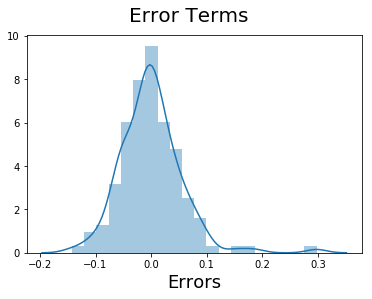

In [111]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

## Step 7: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. twentysix model.

In [112]:
# Applying the scaling on the test sets

num_vars1 = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

df_test[num_vars1] = scaler.transform(df_test[num_vars1])
df_test.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,mfi,mpfi,spdi,spfi,two,-1,0,1,2,3
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.437764,0.559481,0.480376,0.559663,0.428470,0.265673,0.556580,0.544314,0.209375,0.248858,...,0.016129,0.500000,0.048387,0.016129,0.435484,0.145161,0.274194,0.177419,0.241935,0.145161
std,0.212861,0.189947,0.165440,0.215811,0.179488,0.162820,0.228484,0.160738,0.273690,0.163376,...,0.127000,0.504082,0.216335,0.127000,0.499868,0.355139,0.449749,0.385142,0.431751,0.355139
min,0.000000,0.056911,0.183333,0.141593,0.128394,0.067925,-0.111111,-0.060606,0.000000,0.016667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.313793,0.459350,0.358333,0.384956,0.305275,0.177358,0.404762,0.484848,0.093750,0.107292,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.387931,0.547967,0.441667,0.588496,0.406129,0.226415,0.563492,0.585859,0.125000,0.218750,...,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.570690,0.719919,0.516667,0.699115,0.564876,0.316038,0.746032,0.641414,0.150000,0.295833,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.182759,1.089431,0.975000,1.061947,0.935609,0.932075,0.888889,0.863636,1.000000,0.662500,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [113]:
# Dividing into X_test and y_test

y_test = df_test.pop('price')
X_test = df_test



In [114]:
# Now let's use our model to make predictions.

X_train_new = X_train_lm.drop(['const'], axis=1)


In [115]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)


In [116]:
# Making predictions
y_pred = model26.predict(X_test_new)

### Step 8: Model Evaluation
Let's now plot the graph for actual versus predicted values

Text(0,0.5,'y_pred')

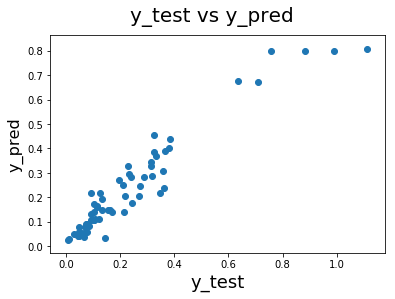

In [117]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      